In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, Activation

2022-02-05 22:51:52.867992: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-05 22:51:52.868118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<ErrorbarContainer object of 3 artists>

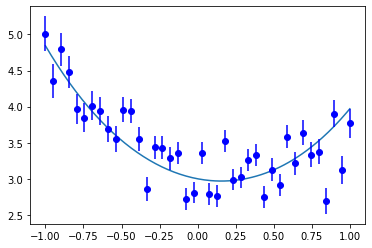

In [17]:
f1 = lambda x: 2.6*x**2 +.2*x
f2 = lambda x: np.exp(-.6*x) -1
f3 = lambda x: 3*np.cos(x)


x = np.linspace(-1,1,200)
y =  f1(x) + f2(x) + f3(x)


sig = 0.05
x_train = np.linspace(-1,1,40)
eps = np.random.normal(0.,0.08,40)
y_train = (f1(x_train) + f2(x_train) + f3(x_train)) *(1+eps)
y_err = (f1(x_train) + f2(x_train) + f3(x_train))*sig


plt.plot(x,y)
plt.errorbar(x_train,y_train,yerr=y_err,fmt="bo")

In [33]:
inputs = tf.keras.Input(shape=(1,))

x = Dense(10, activation='selu',name='l1')(inputs)
#x = Dense(15, activation='selu',name='l2')(x)
#x = Dense(25, activation='selu',name='l3')(x)
#x = Dense(15, activation='selu',name='l4')(x)
x = Dense(10, activation='selu',name='l5')(x)
x = Dense(3,name='l6')(x)
outputs = Dense(1,use_bias=False,name="last")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

loss_fn = tf.keras.losses.mean_squared_error
model.compile(optimizer='Adam',loss=loss_fn)
model.fit(x_train.reshape(-1,1),y_train,epochs=500,verbose=1)

Epoch 1/500
2/2 [==============================] - 1s 3ms/step - loss: 13.1284
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 12.8897
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 12.6743
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 12.4679
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 12.2418
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 12.0300
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8151
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.6013
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3941
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 11.1872
Epoch 11/500
2/2 [==============================] - 0s 3ms/step - loss: 10.9776
Epoch 12/500
2/2 [==============================] - 0s 19ms/step - loss: 10.7810
Epoch 13/500
2/2 [=============================

In [34]:
model.summary()
model.get_layer('last').weights

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 l1 (Dense)                  (None, 10)                20        
                                                                 
 l5 (Dense)                  (None, 10)                110       
                                                                 
 l6 (Dense)                  (None, 3)                 33        
                                                                 
 last (Dense)                (None, 1)                 3         
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'last/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.7695124],
        [ 0.5372947],
        [-0.8216513]], dtype=float32)>]

<ErrorbarContainer object of 3 artists>

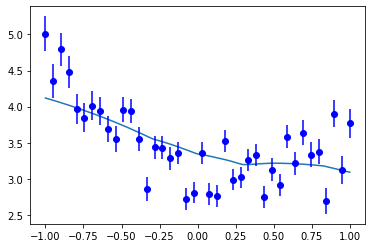

In [36]:
x_test = np.linspace(-1,1,500)
y_test = model(x_test.reshape(-1,1))

plt.plot(x_test,y_test)
plt.errorbar(x_train,y_train,yerr=y_err,fmt="bo")

In [24]:
y1 = Y[:,0]
y2 = Y[:,1]
y3 = Y[:,2]
y4 = Y[:,3]

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

2022-02-05 23:05:42.169364: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:108 : INVALID_ARGUMENT: slice index 1 of dimension 1 out of bounds.


InvalidArgumentError: slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/